# Information Measure and Entropy
## Concept of Information
Information of an event (random event) can be measured by its probability:
$$
\begin{array}{rcl}
I(X) &=& \log_2\dfrac{1}{p_X} \\
     &=& \log\dfrac{1}{p_X} \\
     &=& - \log {p_X}
\end{array}
$$
**Intepretation**: \
*$p_X$ is small* $\Longrightarrow$ *$X$ is hard to guess* $\Longrightarrow$ *$X$ contains lots of information*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math, traceback

### Example 1: Unit of *Information content*
Toss a fair coin ($p = 0.5$), "head" comes out. What how much information for that? 
$$
I("Head") = - \log 0.5 = 1 bit
$$

### Example 2: Information content if we toss $N$ coins
It is important to identify an outcome!! \
Assume that $N = 3$. What is information content of $"HHH"$ ?
$$
I("HHH") = 3 bit
$$

### MISSION: Information content as a function of $p_X$

In [25]:
# Complete this function to calculate information content
def informationContent(p):
    ''' p is array | nparray, each is a probability.
    Return an array of information content for each element in p
    '''
# YOUR CODE HERE
    I=[]
    for x in p:
        i=math.log(1/x,2)
        I.append(i)
    return I
    raise NotImplementedError()

In [27]:
# Testing cell
p = np.arange(0.001, 1, 0.001)

Now we plot Information content as function of probability

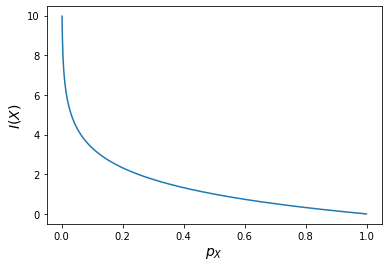

In [28]:
# plt.figure(figsize=(15, 10))
plt.plot(p, informationContent(p))
plt.ylabel(r"$I(X)$", fontsize=14)
plt.xlabel(r"$p_X$", fontsize=14)
plt.show()

## Entropy:
Entropy is <u>Average Information Content</u>. Entropy assocates with an _information source_ \
Given an information source X: 
$$
X = \left \{ x_i | i = 0 .. N \right \} 
$$
and
$$
P(X = x_i) = p_i
$$

Entropy of $X$ is given by:
$$
\begin{array}{rcl}
H(X) &=& E[I(X)] \\
     &=& - \sum_{i=0}^N {p_i \log {p_i}}
\end{array}
$$

### Example 3: 1-bit information source
The information source is : Tossing a coin with probability $p$ and observe "head or tail" outcome

$$
H_{1bit} =  -p \log p - (1 - p) \log (1 - p)
$$

Now, let implement entropy calculation function and plot entropy (of 1-bit source) as a function of $p$

In [36]:
# COMPLETE THE FOLLOWING FUNCTION 
def entropy_1bit(p):
    '''p is a nparray.
    return a nparray of entropy for each item in p
    '''
    # YOUR CODE HERE
    I=[]
    for i in p:
        if(i!=0):
            I.append(-i*math.log(i,2)-(1-i)*math.log(1-i,2))
        else:
            return None
    return I
    raise NotImplementedError()

In [40]:
# Testing cell
assert entropy_1bit([0, 0.1, 0.2]) is None 

In [33]:
# Testing cell
assert entropy_1bit(np.asarray([0.5]))[0] == 1.0 

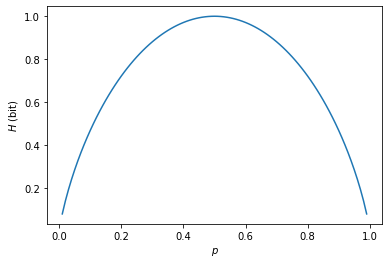

In [34]:
p = np.arange(0.01, 1, 0.01)
plt.plot(p, entropy_1bit(p))
plt.xlabel("$p$")
plt.ylabel("$H$ (bit)")
plt.show()

We can easily realize that H is maximized if $p = 1 - p$ or $p = 0.5$

### MISSION : 
Insert cells AFTER this cell to visualize $H$ of two bit information source.
2-bit information source : tossing two bias coins with probability $p_1$ and $p_2$

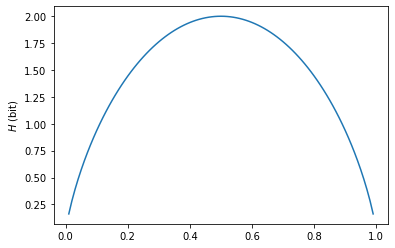

In [44]:
p1 = np.arange(0.01, 1, 0.01)
p2 = np.arange(0.01, 1, 0.01)
H1 = entropy_1bit(p1)
H2 = entropy_1bit(p2)
H12 = [(H1[i]+H2[i]) for i in range(len(p1))]
plt.plot(p1, H12)
plt.ylabel("$H$ (bit)")
plt.show()

### Example 4: Binomial distribution source
Toss N coins and observe the number of heads

$$
\begin{array}{rcl}
    H_{bin} &=& E_{k=0}^{N}\left[Pr(\text{k heads out of N tosses}) \log Pr(\text{k heads out of N tosses})\right]
    Pr(\text{k heads out of N tosses}) &=& \left( \begin{array}{c}
            N \\
            k
        \end{array} \right) p^k (1 - p)^{N-k} \\
        &=& \dfrac{N!}{k!(N -k)!} p^k (1 - p)^{N-k} \\
    H_{bin} &=& - \sum_{k=0}^N \dfrac{N!}{k!(N -k)!} p^k (1 - p)^{N-k} \log{\dfrac{N!}{k!(N -k)!} p^k (1 - p)^{N-k}}
\end{array}
$$

### MISSION: Implement Entropy calculation for binomial information source
Insert cells after this cell to complete this task. You can use library function available in `numpy` and `scipy`

In [49]:
def binomial(k, N):
    '''k, N are scalars
    Return binomial coeficient
    '''
    # YOUR CODE HERE
    co_e=math.factorial(N)/(math.factorial(k)*math.factorial(N-k))
    return co_e
    raise NotImplementedError()
def prob_binomial(k, N, p):
    '''scalar version
    p: scalar value for prob or nparray of prob
    '''
    return binomial(k, N) * (p**k) * ((1-p)**(N-k))

def entropy_binomial(N, p):
    # YOUR CODE HERE
    H= -p*math.log(p,2)-(1-p)*math.log(1-p,2)
    return N*H
    raise NotImplementedError()

p = 0.5
N = 10

In [50]:
# Test if prob sum to 1
sum = 0
for k in range(0, N+1):
    sum = sum + prob_binomial(k, N, p)

assert sum == 1.0

In [51]:
# TESTING CELL
assert entropy_binomial(1, 0.5) == 1

Now, plot $H_{bin}$ as function of $N$ ($p = 0.5)$

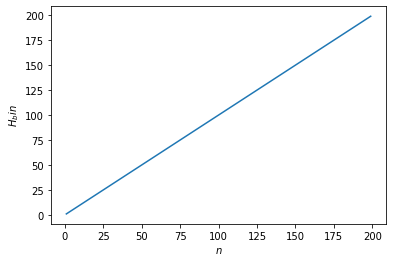

In [54]:
# Complete this cell to plot H_bin agains N
n = np.arange(1, 200, 1)
def plot_Hbin_vs_n(n):
    # YOUR CODE HERE
    H = np.asarray([ entropy_binomial(k, 0.5) for k in n ])
    plt.plot(n, H)
    plt.xlabel("$n$")
    plt.ylabel("$H_bin$")
    plt.show()
    

plot_Hbin_vs_n(n)

Now, let plot $H_{bin}$ against $p$

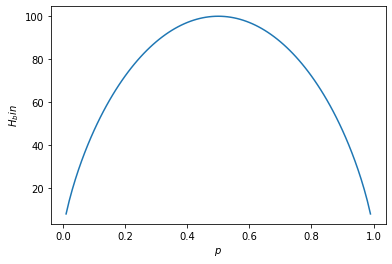

In [56]:
def plot_Hbin_vs_p(p):
    # YOUR CODE HERE
    H = np.asarray([ entropy_binomial(100, k) for k in p ])
    plt.plot(p, H)
    plt.xlabel("$p$")
    plt.ylabel("$H_bin$")
    plt.show()
    
p = np.arange(0.01, 1, 0.01)
plot_Hbin_vs_p(p)

### Example 5: Geometric distribution information source
Repeatitively tossing a coin until we get "head". Observe the number of tosses as output.

Probability that there are $k$ tosses:
$$
Pr\{ k \text{ tosses} \} = p_k = (1 - p)^{k-1} p \hspace{1cm} \text{for } k = 1 .. \infty
$$

Entropy of a geometric information source will be:
$$
\begin{array}{rcl}
H_{Geom} &=& - \sum_{k=1}^\infty (1-p)^{k-1}p \log \left ( (1-p)^{k-1}p \right) \\
         &=& - \sum_{k=1}^\infty (1-p)^{k-1}p \left ((k -1) \log (1-p) + \log p \right)
\end{array}
$$

Let $p = \dfrac{1}{2}$
\begin{array}{rcl}
H_{Geom} &=& \sum_{k=1}^\infty \dfrac{1}{2^k} \log \left ( 2^k \right) \\
         &=& \sum_{k=1}^\infty \dfrac{k}{2^k}
\end{array}

### MISSION:
Derive close form formula for $H_{Geom}$ for the case $p = \frac{1}{2}$ \
You can insert new cell AFTER this cell to make it

### MISSION: 
Now, let write python code to calculate $H_{Geom}$

In [70]:
# Complete the following functions
def geom_prob(k, p = 0.5): 
    # YOUR CODE HERE
    return p**k
    raise NotImplementedError()

def entropy_geom(p = 0.5, N = 1000):
    ''' p is scalar (the probability of a coin)'''
    # YOUR CODE HERE
    return N*geom_prob(N,p)
    raise NotImplementedError()

In [71]:
# Testing cell
# Test if probabilities sum to 1
assert (np.sum(geom_prob(np.arange(1, 100, 1), 0.5)) - 1) < 0.0001

# Testing entropy (Hidden)

Now, let's plot $H_{Geom}$ against $p$

5.153775207320094e-151
90.47921471137089


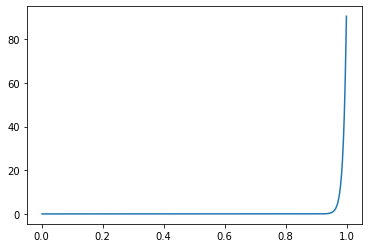

In [72]:
p = np.arange(0.001, 1, 0.001)
print(entropy_geom(0.03, 100))
H = np.asarray([ entropy_geom(v, 100) for v in p ])
print(H.max())
plt.plot(p, H)
plt.show()